In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Documents\cognify\Dataset .csv")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

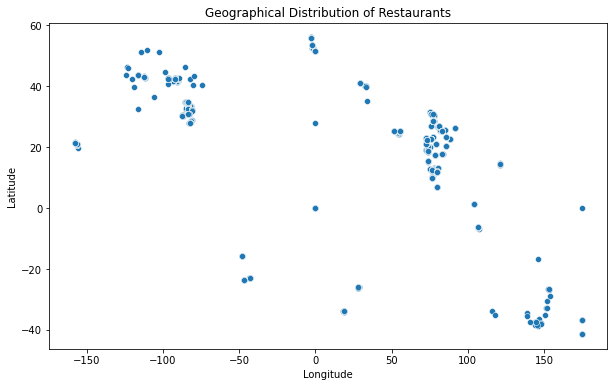

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=df)
plt.title('Geographical Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [5]:
!pip install folium

In [6]:
import folium
latitude=df['Longitude'].mean()
longitude=df['Latitude'].mean()
m=folium.Map(location=[latitude,longitude],zoom_start=14)

for i in range(0,len(df)):
    row=df.iloc[i]
    latitude=row['Latitude']
    longitude=row['Longitude']
    folium.Marker([latitude,longitude]).add_to(m)
m

# Group Restaurants by City

In [7]:
restaurant_counts = df['City'].value_counts()
print("Number of Restaurants by City:\n", restaurant_counts)

Number of Restaurants by City:
 City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64


In [8]:
print("Top 5 Cities with Most Restaurants:")
print(restaurant_counts.nlargest(5))

Top 5 Cities with Most Restaurants:
City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64


In [9]:
df = df.dropna(subset=['Cuisines'])


In [10]:
df1=df.copy()

In [11]:
df1['Cuisines'] = df1['Cuisines'].str.replace(',' , '') 
df1['Cuisines'] = df1['Cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
df1['Cuisines'].value_counts().head()

Cuisines
Indian North            936
Chinese Indian North    616
Indian Mughlai North    394
Fast Food               354
Chinese                 354
Name: count, dtype: int64

# Calculate Average Rating by City

In [12]:

city_avg_ratings = df.groupby('City')['Aggregate rating'].mean()
print("Average Ratings by City:\n", city_avg_ratings.sort_values(ascending=False))  # Sort by highest rating


Average Ratings by City:
 City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 140, dtype: float64


This reveals cities with generally higher or lower customer-rated restaurants. Analyze the top and bottom cities to understand potential reasons.

It calculates the average rating for each city, allowing you to identify cities with generally higher or lower-rated restaurants.
Look for cities with both high average ratings and a large number of restaurants. These could be popular dining destinations.
Conversely, cities with low average ratings might warrant further investigation into the restaurant scene. 

# Analyze Cuisine Distribution by City

In [13]:
def analyze_cuisines(city_data):
  cuisines = city_data['Cuisines'].str.split(';').explode()
  cuisine_counts = cuisines.value_counts()
  print(f"Cuisine Distribution in {city}:")
  print(cuisine_counts.nlargest(5))  # Show top 5 cuisines

for city in city_avg_ratings.index:
  city_data = df.loc[df['City'] == city]
  analyze_cuisines(city_data.copy())

Cuisine Distribution in Abu Dhabi:
Cuisines
American                      2
Indian                        2
Italian, Pizza                2
American, Mexican, Seafood    1
Chinese                       1
Name: count, dtype: int64
Cuisine Distribution in Agra:
Cuisines
North Indian, Mughlai                 5
North Indian, Chinese, Continental    2
North Indian                          1
Rajasthani                            1
North Indian, Chinese, Mughlai        1
Name: count, dtype: int64
Cuisine Distribution in Ahmedabad:
Cuisines
Chinese, Italian, North Indian, Mexican, Mediterranean, Thai    1
North Indian, Chinese, Continental                              1
Cafe, American, Continental, Armenian, Fast Food                1
North Indian, Italian, Asian, South Indian                      1
Continental, Italian, Chinese                                   1
Name: count, dtype: int64
Cuisine Distribution in Albany:
Cuisines
Japanese, Steak, Sushi      2
BBQ, Burger, Seafood        1
Amer

Name: count, dtype: int64
Cuisine Distribution in Dubai:
Cuisines
Indian                                    3
Mediterranean, Italian, Thai, European    1
Asian, Chinese                            1
American, Mexican, Burger                 1
Cafe, Burger                              1
Name: count, dtype: int64
Cuisine Distribution in Dubuque:
Cuisines
Mexican                          3
American, Burger                 2
Breakfast                        1
Breakfast, Pizza                 1
American, Burger, Pizza, Cafe    1
Name: count, dtype: int64
Cuisine Distribution in East Ballina:
Cuisines
Cafe    1
Name: count, dtype: int64
Cuisine Distribution in Edinburgh:
Cuisines
American                      2
Cafe, Bakery                  1
Sushi, Japanese, Cantonese    1
Indian, Street Food           1
Thai, Asian                   1
Name: count, dtype: int64
Cuisine Distribution in Faridabad:
Cuisines
North Indian                      28
North Indian, Chinese             27
North Indian, 

Cuisine Distribution in New Delhi:
Cuisines
North Indian             658
North Indian, Chinese    284
Fast Food                242
Chinese                  228
North Indian, Mughlai    207
Name: count, dtype: int64
Cuisine Distribution in Noida:
Cuisines
North Indian             110
North Indian, Chinese     97
North Indian, Mughlai     54
Chinese                   54
Fast Food                 53
Name: count, dtype: int64
Cuisine Distribution in Ojo Caliente:
Cuisines
American, International, Southwestern    1
Name: count, dtype: int64
Cuisine Distribution in Orlando:
Cuisines
Spanish, Tapas                     1
American                           1
American, Breakfast, Vegetarian    1
Mediterranean, Turkish             1
Southern, Cajun, Soul Food         1
Name: count, dtype: int64
Cuisine Distribution in Palm Cove:
Cuisines
Mediterranean, Seafood    1
Name: count, dtype: int64
Cuisine Distribution in Panchkula:
Cuisines
North Indian, Middle Eastern, Pizza    1
Name: count, dtype: in

Cuisine Distribution in Weirton:
Cuisines
Burger, Greek, Sandwich    1
Name: count, dtype: int64
Cuisine Distribution in Wellington City:
Cuisines
Cafe            3
American        2
Cafe, Kiwi      1
French, Kiwi    1
European        1
Name: count, dtype: int64
Cuisine Distribution in Winchester Bay:
Cuisines
Burger, Seafood, Steak    1
Name: count, dtype: int64
Cuisine Distribution in Yorkton:
Cuisines
Asian    1
Name: count, dtype: int64
Cuisine Distribution in ��stanbul:
Cuisines
Cafe                         3
Restaurant Cafe              2
Desserts                     1
Restaurant Cafe, Desserts    1
Bar Food                     1
Name: count, dtype: int64


# Price Range Analysis by City


In [14]:
for city in city_avg_ratings.index:
  city_data = df.loc[df['City'] == city]
  print(f"Price Range Summary in {city}:")
  print(city_data['Price range'].describe())

Price Range Summary in Abu Dhabi:
count    20.000000
mean      3.300000
std       0.801315
min       2.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       4.000000
Name: Price range, dtype: float64
Price Range Summary in Agra:
count    20.00000
mean      2.65000
std       1.03999
min       1.00000
25%       2.00000
50%       3.00000
75%       3.25000
max       4.00000
Name: Price range, dtype: float64
Price Range Summary in Ahmedabad:
count    21.000000
mean      2.571429
std       0.676123
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: Price range, dtype: float64
Price Range Summary in Albany:
count    17.000000
mean      1.823529
std       0.951006
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       4.000000
Name: Price range, dtype: float64
Price Range Summary in Allahabad:
count    20.00000
mean      2.65000
std       0.74516
min       1.00000
25%       2.00000
50%       3.

Price Range Summary in East Ballina:
count    1.0
mean     2.0
std      NaN
min      2.0
25%      2.0
50%      2.0
75%      2.0
max      2.0
Name: Price range, dtype: float64
Price Range Summary in Edinburgh:
count    20.000000
mean      2.900000
std       0.718185
min       2.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: Price range, dtype: float64
Price Range Summary in Faridabad:
count    251.000000
mean       1.454183
std        0.600743
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: Price range, dtype: float64
Price Range Summary in Fernley:
count    1.0
mean     1.0
std      NaN
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: Price range, dtype: float64
Price Range Summary in Flaxton:
count    1.0
mean     3.0
std      NaN
min      3.0
25%      3.0
50%      3.0
75%      3.0
max      3.0
Name: Price range, dtype: float64
Price Range Summary in Forrest:
count

Price Range Summary in Mysore:
count    20.000000
mean      2.450000
std       0.887041
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: Price range, dtype: float64
Price Range Summary in Nagpur:
count    20.000000
mean      2.300000
std       0.801315
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: Price range, dtype: float64
Price Range Summary in Nashik:
count    20.000000
mean      2.800000
std       0.894427
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: Price range, dtype: float64
Price Range Summary in New Delhi:
count    5473.000000
mean        1.621597
std         0.820218
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: Price range, dtype: float64
Price Range Summary in Noida:
count    1080.000000
mean        1.601852
std         0.727327
min         1.000000

Name: Price range, dtype: float64
Price Range Summary in Valdosta:
count    20.000000
mean      2.250000
std       0.786398
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: Price range, dtype: float64
Price Range Summary in Varanasi:
count    20.000000
mean      2.450000
std       0.887041
min       1.000000
25%       2.000000
50%       2.500000
75%       3.000000
max       4.000000
Name: Price range, dtype: float64
Price Range Summary in Vernonia:
count    1.0
mean     1.0
std      NaN
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: Price range, dtype: float64
Price Range Summary in Victor Harbor:
count    1.0
mean     2.0
std      NaN
min      2.0
25%      2.0
50%      2.0
75%      2.0
max      2.0
Name: Price range, dtype: float64
Price Range Summary in Vineland Station:
count    1.0
mean     4.0
std      NaN
min      4.0
25%      4.0
50%      4.0
75%      4.0
max      4.0
Name: Price range, dtype: float64
Pr

In [15]:
def visualize_restaurants(df):
  latitude = df1['Latitude'].mean()
  longitude = df1['Longitude'].mean()
  m = folium.Map(location=[latitude, longitude], zoom_start=12)
  for i in range(0, len(df)):
      row = df1.iloc[i]
      latitude = row['Latitude']
      longitude = row['Longitude']
      folium.Marker([latitude, longitude]).add_to(m)
  return m
italian_restaurants = df1[df1['Cuisines'].str.contains("Italian")]
italian_map = visualize_restaurants(italian_restaurants.copy())
italian_map

# Calculate Statistics by City

In [16]:
city_avg_ratings = df.groupby('City')['Aggregate rating'].mean()
print("Average Ratings by City:\n", city_avg_ratings)

Average Ratings by City:
 City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.552941
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 140, dtype: float64
